### Objective of the case study : To demonstrate the effect of tweaking the probability threshold of a classifier.

Classification models often perform poorly on datasets with **class imbalance**. Class imbalance refers to a condition in which instances of one class have an overwhelming majority over instances of the other class/classes. As a result of class imbalance, classification models are often found to perform extremely well on instances of the class that are present in abundance, whereas the performance of the model is extremely poor on instances that belong to the scarce class. In this case study I wish to demonstrate that the aforementioned problem, in the context of binary classification, can be addressed by **tweaking the probability threshold of a a class label on which the performance of the classifier is unsatisfactory.**
________________________________________________________________________________________________________________________________

#### Approach:

Inorder to demonstrate what we wish to, we will train the classifier on a dataset created by sampling instances of either class in roughly the same proportion in which they are present in the original dataset. The dataset thus obtained will be split into a training set and a testing set. 

The classifier will be trained on the instances of the training set and predictions will be made on the intsnaces of the testing set. After the classifier has been trained, we will focus our attention on the class label, instances of which have been misclassified the most. 

For the class label under consideration , we wil tweak its threshold to a value such that, instances having probability values above the threshold are designated label 1 and instances having probability values below the threshold are designated label 0.

The value of the threshold thus arrived at will be used to make predictions on the remaining instances of the dataset from which 
instances of either class had been sampled while maintaining their relative proportion. It is expected that this approach will yield the classifier to classify instances correctly, irrespective of the class to which they belong. 


_______________________________________________________________________________________________________________________________

#### Data Set Information:

DATA SOURCE : https://archive.ics.uci.edu/ml/machine-learning-databases/00222/

The dataset that we have has been derived from a marketing campaign run by a Portugese Banking Institution between 2008 and 2013. By training a classifier on the dataset we have, we want to evolve a model that can be used to asses the likelihood of a client's subscribing to term deposit when contacted over the telephone. Clients which have a high likelihood of subscribing to the term deposit are accorded the label **1** and those having low likelihood are accorded the label **0** by the classifier.
________________________________________________________________________________________________________________________________

#### Input Features :

#### Bank Client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

#### Related with the last contact of the current campaign :

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Other attributes/input features :

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### Social and Economic Context attributes/input features :

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

#### Output Feature / Target Feature :

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

    

#### 1)  Importing the dataset along with the relevant libraries  :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import numpy as np
bank_data=pd.read_csv('bank-additional-full.csv',sep=';')
bank_data.head()

Populating the interactive namespace from numpy and matplotlib


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### 2.1) Dataset Inspection

In [2]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

#### 2.2) Checking for class imbalance:

In [2]:
bank_data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

It is thus apparent that the dataset is infested with severe class imbalance.

#### 3) Data Preporcessing :

Data preprocessing involves 2 steps :

1) **LabelEncoding** :

Label Encoding is the process of assigning numerical labels to values contained within categorical attributes of the
dataframe. Label Encoding is performed inorder to facilitate the application of predictive mathematical models such
as **Logistic Regression**, **Support Vector Machines**, **Naive-Baye's** etc, to those datasets which contain categorical/non-numerical data. Label Encoding is performed in two stages which are as follows:

a) The Categorical attributes have to be fetched from the main dataframe.

b) The values contained within the categorical attributes have been assigned numerical labels.

2) **OneHotEncoding** :

In order to facilitate the application of mathamatical models to datasets, merely assigning numerical labels to categorical attributes is simply not enough. One must remember that the assigned numerical labels are not related to each other in an ordinal sense, therefore we use a technique called 'OneHotEncoding' which, what basically does is, the following :

A column representing a categorical attribute is split into multiple columns such that we have new columns equal to the number of all the numerical labels used for encoding the values contained within the column under consideration. Inorder to expand upon what has just been stated, consider the following, the column of the dataframe named 'job' contains 41118 values, these 41118 values have been assigned numerical labels using integers from 0 to 12 i.e 13 integers. We will now split the 'job' column into 13 columns and each of the columns will represent an integer from 0 to 12.

For a particular observation (row index) if the job is encoded with a label '3', it will reflect in the newly created columns in the following way, the column that reprsents label '3' will be assigned 1 whereas rest of the columns will be assigned '0' and so on. This holds true for all the encoded categorical columns.

To sum up 'OneHotEncoding' can be described as the process of assigning a binary sequence of a particular 'length' to each value conatined within a 'LabelEncoded' attribute. The 'length'of the binary sequence is equal to the number of numerical labels used to represent the different values contained within a categorical column.

CAUTION : WE MUST REFRAIN FROM OneHotEncoding THE TARGET ATTRIBUTE



#### 3.1)  Label Encoding:

#### 3.1.1) Fetching categorical features from the dataset along with their column indices :

In [3]:
#extracting categorical features from the dataset
categorical_feature=bank_data.select_dtypes(include=object).columns


#extracting the indices of the categorical features
categorical_index=[]
for feature in categorical_feature:
    categorical_index.append(bank_data.columns.get_loc(feature))
feature_index=pd.DataFrame(data={'feature':categorical_feature,'index':categorical_index})
print('Categorical Features :', categorical_feature)
print('Categorical Indices :',categorical_index)
feature_index

Categorical Features : Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
Categorical Indices : [1, 2, 3, 4, 5, 6, 7, 8, 9, 14, 20]


,feature,index
0,job,1
1,marital,2
2,education,3
3,default,4
4,housing,5
5,loan,6
6,contact,7
7,month,8
8,day_of_week,9
9,poutcome,14


#### 3.1.2) Label Encoding the categorical attributes :

**Sequence of steps :**

1) Import the **LabelEncoder** class from preprocessing module.

2) Instantiate an object of the **LabelEncoder** class.

3) Apply **LabelEncoding** to each categorical feature.

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for index in categorical_index:
    bank_data.iloc[:,index]=encoder.fit_transform(bank_data.iloc[:,index])
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


#### 3.2)  One Hot Encoding:

**Sequence of steps:**

1) Import **OneHotEncoder** class from preprocessing module.

2) Instantiate an object of the **OneHotEncoder** class and feed it the categorical input indices that are to be hot encoded.

3) Apply **OneHotEncoding** to the input features.

4) Create a table containing the splits rendered to each input categorical feature.

In [5]:
from sklearn.preprocessing import OneHotEncoder 
hot_encoder=OneHotEncoder(categorical_features=[1, 2, 3, 4, 5, 6, 7, 8, 9, 14]) 
bank_data=hot_encoder.fit_transform(bank_data).toarray()
categorical_column_splitting=pd.DataFrame(data={'Categorical_Index':[1, 2, 3, 4, 5, 6, 7, 8, 9, 14],'Splits_Rendered':hot_encoder.n_values_})
categorical_column_splitting

,Categorical_Index,Splits_Rendered
0,1,12
1,2,4
2,3,8
3,4,3
4,5,3
5,6,3
6,7,2
7,8,10
8,9,5
9,14,3


#### 4 ) Sampling instances from the original dataset: 

Instead of fitting the model on the entire dataset we create new dataset by drawing samples of either class in roughly the same proportion in which they are present in the original dataset. This is done inorder to mimic the class imbalance in the original dataset. We randomly sample 4000 instances of class 0 and 500 instances of class 1.

**CAUTION !!!** WE MUST ENSURE THAT THE SAMPLED INSTANCES ARE REMOVED FROM THE MAIN DATASET.

In [6]:
#datafrane containing onehot encoded instances
bank_data=pd.DataFrame(data=bank_data)
bank_data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0


In [7]:
#sampling 4000 negative samples and 500 positive samples from the onehotencoded dataframe with replacement.
dataset_negative=bank_data[bank_data[63]==0].sample(n=4000,replace=False,random_state=0)
dataset_positive=bank_data[bank_data[63]==1].sample(n=500,replace=False,random_state=0)

#creating the training set from sampled instances and shuffling its rows
training_data=pd.concat([dataset_negative,dataset_positive])
training_data=training_data.reindex(np.random.permutation(training_data.index))

#removing the sampled instances from the 'OneHotEncoded' dataframe.
bank_data=bank_data.drop(training_data.index)

#### 5) Splitting the sampled dataset into training set and testing set:

In [8]:
#extarcting the insput features and target feature
X=training_data.iloc[:,0:63].values
Y=training_data.iloc[:,63].values

#splitting the training set further into training set and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1500,random_state=0)

#### 6) Standardizing the attribute values :

Standardization is defined as the process of transform the dataframe in such a way that, the variance 
of each column is equal to 1 and the mean is 0. A column is standardized by replacing each value of the column by its corresponding Z-score. The Z-Score of a value is defined as the number of standard deviations away an observation is from the mean value.

In [9]:
#importing the StandardScaler class from the preprocessing module and creating an object of the same class
from sklearn.preprocessing import StandardScaler 
standardizer=StandardScaler()

#standardizing the input features of the training set and testing set :
X_train=standardizer.fit_transform(X_train)
X_test=standardizer.transform(X_test)

#### 7)  Fitting the model :

Sequence of steps :

1) Import **LogisticRegression** linear_model module and instantiate an object of the same.

2) Fit the model on the training data and make predictions for the test set.

3) Evaluate the performance of the model on various metrics of classification.

In [10]:
from sklearn.linear_model import LogisticRegression
logreg_clf=LogisticRegression()

logreg_clf.fit(X_train,Y_train)
Y_pred=logreg_clf.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score
CM=confusion_matrix(Y_test,Y_pred)
print('SPECIFICITY:',CM[0,0]/(CM[0,0]+CM[0,1]))
print('SENSITIVITY:',CM[1,1]/(CM[1,0]+CM[1,1]))
print('CONFUSION MATRIX: \n',CM)

SPECIFICITY: 0.9661654135338346
SENSITIVITY: 0.36470588235294116
CONFUSION MATRIX: 
 [[1285   45]
 [ 108   62]]


From the confusion matrix it is pretty clear that high class imabalance manifests in the model in the form of its accuracy being extremely high on the abundant class label and being very low on the scarce class label.

#### 8)  A brief introduction to various evaluation metrics for assesing the performance of a classification model :

1) **True Positive Rate (TPR)/Sensitivity/Recall** : When the actual value is positive, how often is the prediction correct?

   **Formula**: True_Positive/(True_Positive + False_Negative)

2) **Specificity** : When the actual value is negative, how often is the prediction correct?

   **Formula**: True_negative/(True_Negative + False_Positive)

3) **False Positive Rate (FPR)** : When the actual value is negative, How often is the prediction incorrect?

   **Formula**: 1-Specificity

4) **Precision** : When a positive value is predicted, how often is the prediction correct?

   **Formula** : True_Positive/ (False_Positive + True_Positive)

5) **Accuracy** : Ratio of correct predictions to the total number of predictions.

   **Formula** : True_Positive + True_Negative/(True_Positive+True_Negative+False_Positive+False_Negative)

#### 9) The Concept of Thresholding :


**Threshold** : With regrad to binary classification using LogisticRegression classifier, threshold can be understood in the following way, for a combination of input feature values of an instance fed to the classifier, it outputs a number between 0 and 1. This quantity represents the probability of the instance's belonging to class 1, and when this quantity is subtracted from 1, we have the probability of the instance's belonging to class 0. An instance is designated class labels based on which ever probability is larger. Thus the default class probability value for which class labels are assigned to instances is called the **threshold**. In general the value of threshold is 0.50. 

**Thresholding** : If a classifier, such as LogisticRegression, is good at correctly classifying only those instances that belong to a particular class, we adopt the following strategy inorder to balance the classifier's performance on either class. We focus on the class, instances of which are mostly misclassified by the classifier. We then **binarize the class probabilties with respect to different thresholds between 0 and 1**. *Binarizing class probabilities with respect to different thresholds* means that for a particular threshold, instances having class probabilities below that threshold are assigned **label 0** and instances having class probabilities above that threshold are assigned **label 1**. This process is repeated for a sequence of thresholds between 0 and 1. 

At each each threshold, the **binarized class probabilities** and **actual class labels** are used to compute *Specificity* and *Sensitivity*. The threshold that corresponds to the specificity and the sensitivity being equal is the desired threshold.

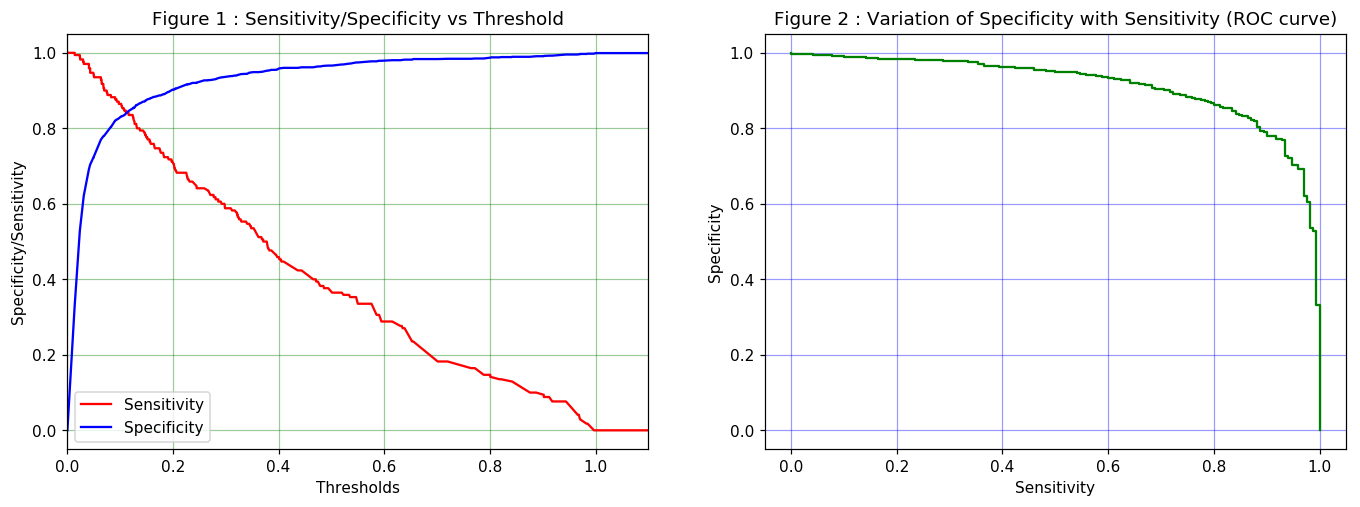

In [11]:

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5),dpi=110)

#code for obtaining various combinations of False_Positive_Rate (1-Specificity),True_Positive_Rate (Sensitivity) and Threshold.
Y_pred_prob=logreg_clf.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred_prob[:,1])

#code for plotting the variation of specificity and sensitivity with threshold
ax[0].set_xlim(0,1.10)
ax[0].plot(thresholds,tpr,color='red',label='Sensitivity')
ax[0].plot(thresholds,1-fpr,color='blue',label='Specificity')
ax[0].set_xlabel('Thresholds')
ax[0].set_ylabel('Specificity/Sensitivity')
ax[0].set_title('Figure 1 : Sensitivity/Specificity vs Threshold')
ax[0].legend()
ax[0].grid(color='green',alpha=0.4)

#code for plotting the variation of sensitivity and specificity with respect to each other
ax[1].plot(tpr,1-fpr,color='green')
ax[1].set_xlabel('Sensitivity')
ax[1].set_ylabel('Specificity')
ax[1].set_title('Figure 2 : Variation of Specificity with Sensitivity (ROC curve)')
ax[1].grid(color='blue',alpha=0.4)

In the plot titled, ***Figure 1 : Sensitivity/Specificity vs Threshold*** , the curve plotted in blue, highlights the variation of *Specificity* with respect to the threshold ,whereas, the curve in red represents the variation of *Sensitivity* of the classifier with respect to the threshold. We wish to choose a threshold value such that the specificity and the sensitivity at that value are approximately equal i.e we wish to determine the threshold at which the specificity and the sensitivity curves intersect.

#### 10) Code for determining the optimal threshold :

Optimal threshold is determined in the following way, create a dataframe containg three columns, namely, *Sensitivity*, *Specificity* and *Threshold*. Once the dataframe is created, append to it another column titled *difference*. This column contains the the difference between *Specificity* and *Sensitivity* for each instance of the dataframe. Having done so, we then sort the dataframe in an ascending order with respect to the 'difference' column. The value of the threshold, that corresponds to the first row of the dataframe is our optimal threshold. 

In [12]:
threshold_data=pd.DataFrame(data={'sensitivity':tpr,'specificity':fpr,'threshold':thresholds})
threshold_data['specificity']=1-threshold_data['specificity']
threshold_data['difference']=threshold_data['sensitivity']-threshold_data['specificity']
threshold_data=threshold_data[threshold_data['difference']>=0]

In [13]:
threshold_data.head()

,sensitivity,specificity,threshold,difference
162,0.841176,0.839098,0.111124,0.002079
163,0.847059,0.839098,0.110911,0.007961
164,0.847059,0.834586,0.107939,0.012472
165,0.852941,0.834586,0.107321,0.018355
166,0.852941,0.832331,0.104691,0.020610


In [14]:
threshold_data.reset_index(drop=True,inplace=True)
threshold_data.sort_values(by=['difference'],ascending='True',inplace=True)
threshold_data.head()

,sensitivity,specificity,threshold,difference
0,0.841176,0.839098,0.111124,0.002079
1,0.847059,0.839098,0.110911,0.007961
2,0.847059,0.834586,0.107939,0.012472
3,0.852941,0.834586,0.107321,0.018355
4,0.852941,0.832331,0.104691,0.020610


#### Optimal threshold :

In [15]:
threshold_data['threshold'][0]

0.11112440405086788

#### 11) Binarizing the probabilities assigned to Class 1:

Having determined the optimal threshold value, we now binarize the probabilities assigned to the positive class label. Binarization means the following, if the assigned probability is greater than the optimal threshold then label **label 1** is assigned else, **label 0** is assigned.

In [16]:
from sklearn.preprocessing import binarize
Y_pred_class = binarize(Y_pred_prob,threshold_data['threshold'][0])
Y_predict=Y_pred_class[:,1]
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(Y_test,Y_predict)
print('SPECIFICITY:',CM[0,0]/(CM[0,0]+CM[0,1]))
print('SENSITIVITY:',CM[1,1]/(CM[1,0]+CM[1,1]))
print('CONFUSION MATRIX: \n',CM)

SPECIFICITY: 0.8398496240601504
SENSITIVITY: 0.8411764705882353
CONFUSION MATRIX: 
 [[1117  213]
 [  27  143]]


As a result of binarizing the probabilities assigned to Label 1 using an optimal threshold, the specificity has dipped from 96.6% to 83.9%, whereas, the sensitivity has increased from a meager 36.4% to an impressive 84.1%. The optimal threshold thus determined can be used to boost  the performance of the classification model on the remaining instances of the original dataset from which instances had been sampled to create a dataframe bearing class imbalance in the same proportion as the original one did.

#### 12)  Performance of the logistic regression classifier  the remaining instances of the original dataset  with and without binarization.

#### 12.1) With Binarization:

In [17]:
bank_data=bank_data.reindex(np.random.permutation(bank_data.index))

X_test=bank_data.iloc[:,0:63]
Y_test=bank_data.iloc[:,63]

from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X_test=standardizer.fit_transform(X_test)

Y_pred=logreg_clf.predict(X_test)
Y_pred_prob=logreg_clf.predict_proba(X_test)

from sklearn.preprocessing import binarize
Y_pred_class = binarize(Y_pred_prob,threshold=threshold_data['threshold'][0])

Y_predict=Y_pred_class[:,1]
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(Y_test,Y_predict)
print('SPECIFICITY:',CM[0,0]/(CM[0,0]+CM[0,1]))
print('SENSITIVITY:',CM[1,1]/(CM[1,0]+CM[1,1]))
print('CONFUSION MATRIX: \n',CM)

SPECIFICITY: 0.8517881283028143
SENSITIVITY: 0.8538647342995169
CONFUSION MATRIX: 
 [[27724  4824]
 [  605  3535]]


#### 12.2) Without Binarization:

In [18]:
X_test=bank_data.iloc[:,0:63]
Y_test=bank_data.iloc[:,63]

from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X_test=standardizer.fit_transform(X_test)

Y_predict=logreg_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
CM=confusion_matrix(Y_test,Y_predict)
print('SPECIFICITY:',CM[0,0]/(CM[0,0]+CM[0,1]))
print('SENSITIVITY:',CM[1,1]/(CM[1,0]+CM[1,1]))
print('CONFUSION MATRIX: \n',CM)

SPECIFICITY: 0.9722256359837778
SENSITIVITY: 0.38454106280193234
CONFUSION MATRIX: 
 [[31644   904]
 [ 2548  1592]]


#### 13) Conclusion :

From the above results it can be clearly seen that the classification model that takes into account binarized prediction of the scarce class label has a better performance on instances of either class.

**SUMMARY**

***Specificity***:

WITH THRESHOLDING : 85.17%

WITHOUT THRESHOLDING : 97%


***Sensitivity***: 

WITH THRESHOLDING : 85.38%

WITHOUT THRESHOLDING :38%

***MAGNITUDE OF DIFFERENCE IN SENSITIVITY AND SPECIFICITY :***

WITH THRESHOLDING : 0.21%

WITHOUT THRESHOLDING : 59%